### Линейный Дискриминант Фишера (ЛДФ) / Линейный Дискриминантный Анализ (ЛДА)

Линейный Дискриминант Фишера (ЛДФ), часто называемый Линейным Дискриминантным Анализом (ЛДА), является методом классификации, который строит линейную комбинацию признаков, наилучшим образом разделяющую два или более класса объектов.

**Ключевые предположения ЛДА:**
1.  **Нормальное распределение:** Признаки каждого класса распределены согласно многомерному нормальному закону.
2.  **Равные ковариационные матрицы:** Все классы имеют одинаковую ковариационную матрицу (общековариационная матрица).

На основе этих предположений функция плотности вероятности для каждого класса имеет одинаковую форму, отличаясь только вектором средних значений $\mu_y$.

#### Дискриминантная функция

При условии одинаковых ковариационных матриц $\Sigma_y = \Sigma$ для всех классов, правило классификации, основанное на максимизации логарифма апостериорной вероятности (с учетом штрафов и априорных вероятностей), упрощается до линейной дискриминантной функции. Для каждого класса $y$ она имеет вид:

$$a(x) = \operatorname{argmax}_{y \in Y} (\ln(\lambda_y \cdot P_y) + x^T \Sigma^{-1} \mu_y - \frac{1}{2} \mu_y^T \Sigma^{-1} \mu_y)$$

где:
- $x$ — вектор признаков классифицируемого объекта.
- $\mu_y$ — вектор средних значений (математических ожиданий) для класса $y$.
- $\Sigma$ — общая ковариационная матрица для всех классов.
- $\Sigma^{-1}$ — обратная общая ковариационная матрица.
- $\lambda_y$ — штраф за неверную классификацию класса $y$.
- $P_y$ — априорная вероятность появления образов класса $y$.

В этой формуле:
- Член $\ln(\lambda_y \cdot P_y)$ учитывает априорные вероятности классов и штрафы.
- Члены $x^T \Sigma^{-1} \mu_y$ и $- \frac{1}{2} \mu_y^T \Sigma^{-1} \mu_y$ являются частью логарифма плотности многомерного нормального распределения. При сравнении этих функций для двух классов, квадратичный член $x^T \Sigma^{-1} x$ сокращается, поскольку $\Sigma$ одинакова для всех классов, что приводит к линейной функции относительно $x$.

Линейный дискриминант Фишера можно записать в виде:

$$a(x) = \operatorname{argmax}_{y \in Y} (x^T \cdot \alpha_y + \beta_y)$$

где

$$\alpha_y = \hat{\Sigma}^{-1} \cdot \hat{\mu}_y$$

$$\beta_y = \ln(\lambda_y \cdot P_y) - 0.5 \cdot \hat{\mu}_y^T \cdot \hat{\Sigma}^{-1} \cdot \hat{\mu}_y$$

Именно поэтому его называют линейным, поскольку функция $a(x)$ представляет собой линейную комбинацию признаков $x$ с коэффициентами, зависящими от параметров класса.

#### Оценка параметров

- **Оценка векторов средних значений $\mu_y$**: Вычисляются как среднее арифметическое для каждого класса по отдельности.
  $$\mu_y = \frac{1}{N_y} \sum_{i \in \text{class } y} x_i$$

- **Оценка общей ковариационной матрицы $\Sigma$**: Вычисляется как взвешенное среднее ковариационных матриц каждого класса или как общая ковариация всех данных после вычитания средних соответствующих классов. В данном случае, это:
  $$\Sigma = \frac{1}{N_{total}} \sum_{y} \sum_{i \in \text{class } y} (x_i - \mu_y)(x_i - \mu_y)^T$$
  где $N_{total}$ — общее количество всех объектов в выборке.

#### Классификация

Для каждого нового объекта $x$, значение дискриминантной функции вычисляется для каждого класса, и объект присваивается тому классу, для которого эта функция достигает максимального значения.

#### Оценка качества классификатора

Для оценки качества классификации используется показатель $Q$, который представляет собой долю неверно классифицированных объектов:

$$Q(a,X) = \frac{1}{n} \sum_{i=1}^{n} [a(x_i) \neq y_i]$$

где:
- $n$ — общее количество объектов в выборке.
- $a(x_i)$ — предсказанный класс для объекта $x_i$.
- $y_i$ — истинный класс объекта $x_i$.
- $[\cdot]$ — скобки Айверсона, означающие, что выражение равно 1, если условие внутри истинно, и 0 в противном случае.

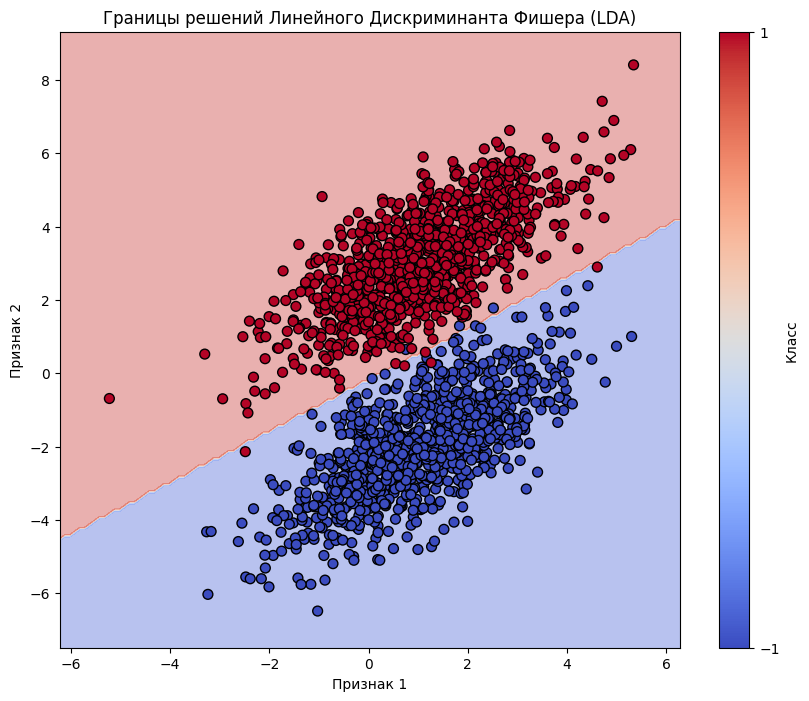

In [1]:
import numpy as np

np.random.seed(0)

# исходные параметры распределений двух классов
mean1 = [1, -2]
mean2 = [1, 3]
r = 0.7
D = 2.0
V = [[D, D * r], [D * r, D]]

# моделирование обучающей выборки
N = 1000
x1 = np.random.multivariate_normal(mean1, V, N).T
x2 = np.random.multivariate_normal(mean2, V, N).T

x_train = np.hstack([x1, x2]).T
y_train = np.hstack([np.ones(N) * -1, np.ones(N)])

# вычисление оценок математических ожиданий
mm1 = np.mean(x1.T, axis=0)
mm2 = np.mean(x2.T, axis=0)

# вычисление общей ковариационной матрицы (LDA - общая ковариация)
a = np.hstack([(x1.T - mm1).T, (x2.T - mm2).T])
VV = np.array([[np.dot(a[0], a[0]) / (2*N), np.dot(a[0], a[1]) / (2*N)],
               [np.dot(a[1], a[0]) / (2*N), np.dot(a[1], a[1]) / (2*N)]])

# обратная матрица ковариации
VV_inv = np.linalg.inv(VV)

# штрафы и априорные вероятности
l1 = l2 = 1
P1 = P2 = 0.5

# дискриминантная функция Фишера
def delta(x, mu, Sigma_inv, lam=1, P=0.5):
    return np.log(lam*P) - 0.5 * (mu.T @ Sigma_inv @ mu) + (x.T @ Sigma_inv @ mu)

# классификация
predict = []
for x in x_train:
    d1 = delta(x, mm1, VV_inv, l1, P1)
    d2 = delta(x, mm2, VV_inv, l2, P2)
    predict.append(1 if d2 > d1 else -1)

predict = np.array(predict)

# показатель качества (количество ошибок)
Q = np.sum(predict != y_train)
import matplotlib.pyplot as plt

# Определим границы для построения сетки
x1_min, x1_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
x2_min, x2_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1

# Создадим сетку
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                       np.arange(x2_min, x2_max, 0.1))

# Функция для классификации одной точки с использованием delta функции LDA
def classify_point_lda(x_point, mm1_lda, mm2_lda, VV_inv_lda, l1_lda, P1_lda, l2_lda, P2_lda):
    d1 = delta(x_point, mm1_lda, VV_inv_lda, l1_lda, P1_lda)
    d2 = delta(x_point, mm2_lda, VV_inv_lda, l2_lda, P2_lda)
    return 1 if d2 > d1 else -1

# Классифицируем каждую точку в сетке
Z_lda = np.array([classify_point_lda(np.array([x1_val, x2_val]), mm1, mm2, VV_inv, l1, P1, l2, P2) for x1_val, x2_val in np.c_[xx1.ravel(), xx2.ravel()]])
Z_lda = Z_lda.reshape(xx1.shape)

plt.figure(figsize=(10, 8))

# Отображаем области решений
plt.contourf(xx1, xx2, Z_lda, alpha=0.4, cmap=plt.cm.coolwarm)

# Отображаем обучающие данные
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', s=50)

plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Границы решений Линейного Дискриминанта Фишера (LDA)')
plt.colorbar(ticks=[-1, 1], label='Класс')
plt.show()